In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def skip_row(n):
    # Generate the list of all numbers from 1 to 71252
    all_numbers = list(range(1, n))  
    # The generated_numbers list from the previous code
    start = 1
    end = n
    batch_size = 100
    interval = 11
    generated_numbers = []

    while start <= end:
        batch = list(range(start, start + batch_size))
        generated_numbers.extend(batch)
        start += batch_size + interval

    # Remove the generated_numbers from the all_numbers list
    for num in generated_numbers:
        all_numbers.remove(num)
    return all_numbers


In [30]:
all_numbers = skip_row(71252)
df = pd.read_csv('50.csv', skiprows=all_numbers)

#uncomment below for callibration to Newton
# df['Voltage_0'] = (df['Voltage_0'] * 176.8325) - 19.5057

In [31]:
df.shape

(64200, 2)

In [32]:
# Calculate the number of data points for the first 60 seconds (60 seconds * 1000 Hz)
data_points = 60 * 1000

# Extract the first 60 seconds of data
data_subset = df.iloc[:data_points, :]

# Calculate minimum, maximum, and median for both columns
min_col_0 = np.min(data_subset['Voltage_0'])
max_col_0 = np.max(data_subset['Voltage_0'])
median_col_0 = np.median(data_subset['Voltage_0'])

min_col_1 = np.min(data_subset['Voltage_1'])
max_col_1 = np.max(data_subset['Voltage_1'])
median_col_1 = np.median(data_subset['Voltage_1'])

# Print the results
print("Statistics for Hand Dynamometer:")
print(f"Minimum: {min_col_0}")
print(f"Maximum: {max_col_0}")
print(f"Median: {median_col_0}\n")

print("Statistics for EMG:")
print(f"Minimum: {min_col_1}")
print(f"Maximum: {max_col_1}")
print(f"Median: {median_col_1}")


Statistics for Hand Dynamometer:
Minimum: 0.09728
Maximum: 1.759792
Median: 0.352877

Statistics for EMG:
Minimum: 0.441836
Maximum: 2.276469
Median: 0.93627


In [33]:
print(data_subset.shape)
print(df.shape)

(60000, 2)
(64200, 2)


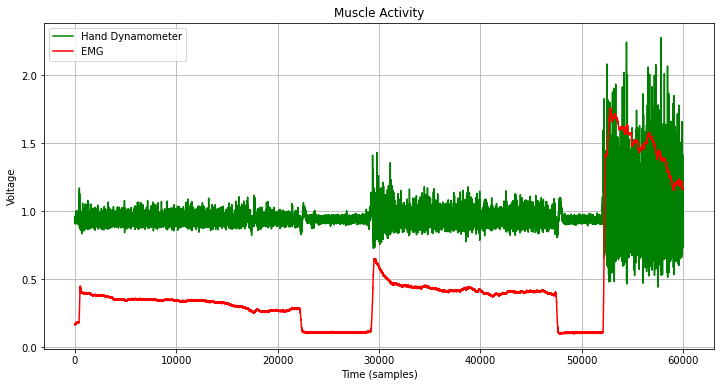

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(data_subset['Voltage_1'], label='Hand Dynamometer', color='green')
plt.plot(data_subset['Voltage_0'], label='EMG', color='red')
plt.title('Muscle Activity')
plt.xlabel('Time (samples)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [35]:
# Define the time intervals in milliseconds
intervals = [(0, 20), (26, 45), (50, 60)]

# Calculate data points for each time interval (milliseconds to data point conversion)
data_points_per_second = 1000  # Sampling rate
data_points = [(start * data_points_per_second, end * data_points_per_second) for start, end in intervals]

# Initialize lists to store the statistics for each interval
min_values = []
max_values = []
median_values = []

# Initialize lists to store all data points for the combined intervals
combined_data_points_col_0 = []
combined_data_points_col_1 = []

# Calculate statistics for each interval and gather data for the combined intervals
for start, end in data_points:
    data_subset = df.iloc[start:end, :]
    
    min_col_0 = np.min(data_subset['Voltage_0'])
    max_col_0 = np.max(data_subset['Voltage_0'])
    median_col_0 = np.median(data_subset['Voltage_0'])

    min_col_1 = np.min(data_subset['Voltage_1'])
    max_col_1 = np.max(data_subset['Voltage_1'])
    median_col_1 = np.median(data_subset['Voltage_1'])
    
    min_values.append((min_col_0, min_col_1))
    max_values.append((max_col_0, max_col_1))
    median_values.append((median_col_0, median_col_1))
    
    # Gather data points for the combined intervals
    combined_data_points_col_0.extend(data_subset['Voltage_0'])
    combined_data_points_col_1.extend(data_subset['Voltage_1'])

# Calculate statistics for the combined intervals
min_combined_col_0 = np.min(combined_data_points_col_0)
max_combined_col_0 = np.max(combined_data_points_col_0)
median_combined_col_0 = np.median(combined_data_points_col_0)

min_combined_col_1 = np.min(combined_data_points_col_1)
max_combined_col_1 = np.max(combined_data_points_col_1)
median_combined_col_1 = np.median(combined_data_points_col_1)

# Print the results for each interval
for i, (start, end) in enumerate(intervals):
    print(f"Statistics for {start}-{end} seconds:")
    print(f"Minimum for Hand Dynamometer: {min_values[i][0]}, EMG: {min_values[i][1]}")
    print(f"Maximum for Hand Dynamometer: {max_values[i][0]}, EMG: {max_values[i][1]}")
    print(f"Median for Hand Dynamometer: {median_values[i][0]}, EMG: {median_values[i][1]}\n")

# Print the combined statistics
print("Statistics for All Three Intervals Combined:")
print(f"Minimum for Hand Dynamometer: {min_combined_col_0}, EMG: {min_combined_col_1}")
print(f"Maximum for Hand Dynamometer: {max_combined_col_0}, EMG: {max_combined_col_1}")
print(f"Median for Hand Dynamometer: {median_combined_col_0}, EMG: {median_combined_col_1}\n")


Statistics for 0-20 seconds:
Minimum for Hand Dynamometer: 0.166256, EMG: 0.82217
Maximum for Hand Dynamometer: 0.449894, EMG: 1.170273
Median for Hand Dynamometer: 0.343207, EMG: 0.935948

Statistics for 26-45 seconds:
Minimum for Hand Dynamometer: 0.100503, EMG: 0.727087
Maximum for Hand Dynamometer: 0.651665, EMG: 1.43135
Median for Hand Dynamometer: 0.413795, EMG: 0.935626

Statistics for 50-60 seconds:
Minimum for Hand Dynamometer: 0.099536, EMG: 0.441836
Maximum for Hand Dynamometer: 1.759792, EMG: 2.276469
Median for Hand Dynamometer: 1.428933, EMG: 0.932725

Statistics for All Three Intervals Combined:
Minimum for Hand Dynamometer: 0.099536, EMG: 0.441836
Maximum for Hand Dynamometer: 1.759792, EMG: 2.276469
Median for Hand Dynamometer: 0.382852, EMG: 0.935626



In [36]:
all_numbers = skip_row(123423)
df = pd.read_csv('20_80.csv', skiprows=all_numbers)

#uncomment below for callibration to Newton
#df['Voltage_0'] = (df['Voltage_0'] * 176.8325) - 19.5057

In [37]:
df.shape

(111200, 2)

In [38]:
# Calculate the number of data points for the first 110 seconds 
data_points = 110 * 1000

# Extract the first 110 seconds of data
data_subset = df.iloc[:data_points, :]

# Calculate minimum, maximum, and median for both columns
min_col_0 = np.min(data_subset['Voltage_0'])
max_col_0 = np.max(data_subset['Voltage_0'])
median_col_0 = np.median(data_subset['Voltage_0'])

min_col_1 = np.min(data_subset['Voltage_1'])
max_col_1 = np.max(data_subset['Voltage_1'])
median_col_1 = np.median(data_subset['Voltage_1'])

# Print the results
print("Statistics for Hand Dynamometer:")
print(f"Minimum: {min_col_0}")
print(f"Maximum: {max_col_0}")
print(f"Median: {median_col_0}\n")

print("Statistics for EMG:")
print(f"Minimum: {min_col_1}")
print(f"Maximum: {max_col_1}")
print(f"Median: {median_col_1}")


Statistics for Hand Dynamometer:
Minimum: 0.088255
Maximum: 1.477442
Median: 0.335472

Statistics for EMG:
Minimum: 0.503077
Maximum: 2.003787
Median: 0.934659


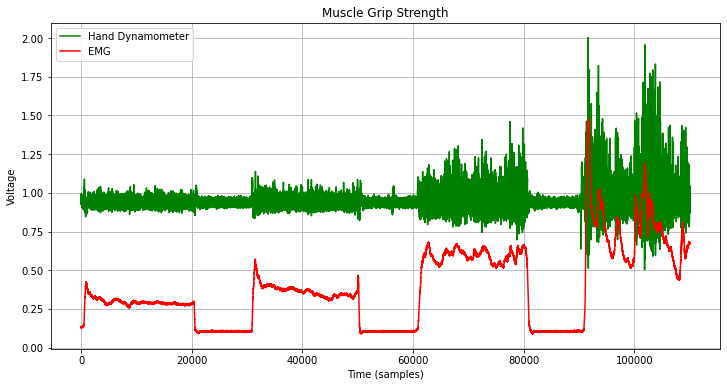

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(data_subset['Voltage_1'], label='Hand Dynamometer', color='green')
plt.plot(data_subset['Voltage_0'], label='EMG', color='red')
plt.title('Muscle Grip Strength')
plt.xlabel('Time (samples)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [40]:
# Define the time intervals in milliseconds
intervals = [(0, 20), (31, 50), (61, 80),(91,110)]

# Calculate data points for each time interval (milliseconds to data point conversion)
data_points_per_second = 1000  # Sampling rate
data_points = [(start * data_points_per_second, end * data_points_per_second) for start, end in intervals]

# Initialize lists to store the statistics for each interval
min_values = []
max_values = []
median_values = []

# Initialize lists to store all data points for the combined intervals
combined_data_points_col_0 = []
combined_data_points_col_1 = []

# Calculate statistics for each interval and gather data for the combined intervals
for start, end in data_points:
    data_subset = df.iloc[start:end, :]
    
    min_col_0 = np.min(data_subset['Voltage_0'])
    max_col_0 = np.max(data_subset['Voltage_0'])
    median_col_0 = np.median(data_subset['Voltage_0'])

    min_col_1 = np.min(data_subset['Voltage_1'])
    max_col_1 = np.max(data_subset['Voltage_1'])
    median_col_1 = np.median(data_subset['Voltage_1'])
    
    min_values.append((min_col_0, min_col_1))
    max_values.append((max_col_0, max_col_1))
    median_values.append((median_col_0, median_col_1))
    
    # Gather data points for the combined intervals
    combined_data_points_col_0.extend(data_subset['Voltage_0'])
    combined_data_points_col_1.extend(data_subset['Voltage_1'])

# Calculate statistics for the combined intervals
min_combined_col_0 = np.min(combined_data_points_col_0)
max_combined_col_0 = np.max(combined_data_points_col_0)
median_combined_col_0 = np.median(combined_data_points_col_0)

min_combined_col_1 = np.min(combined_data_points_col_1)
max_combined_col_1 = np.max(combined_data_points_col_1)
median_combined_col_1 = np.median(combined_data_points_col_1)

# Print the results for each interval
for i, (start, end) in enumerate(intervals):
    print(f"Statistics for {start}-{end} seconds:")
    print(f"Minimum for Hand Dynamometer: {min_values[i][0]}, EMG: {min_values[i][1]}")
    print(f"Maximum for Hand Dynamometer: {max_values[i][0]}, EMG: {max_values[i][1]}")
    print(f"Median for Hand Dynamometer: {median_values[i][0]}, EMG: {median_values[i][1]}\n")

# Print the combined statistics
print("Statistics for All Three Intervals Combined:")
print(f"Minimum for Hand Dynamometer: {min_combined_col_0}, EMG: {min_combined_col_1}")
print(f"Maximum for Hand Dynamometer: {max_combined_col_0}, EMG: {max_combined_col_1}")
print(f"Median for Hand Dynamometer: {median_combined_col_0}, EMG: {median_combined_col_1}\n")


Statistics for 0-20 seconds:
Minimum for Hand Dynamometer: 0.1279, EMG: 0.844732
Maximum for Hand Dynamometer: 0.423787, EMG: 1.088404
Median for Hand Dynamometer: 0.288736, EMG: 0.935303

Statistics for 31-50 seconds:
Minimum for Hand Dynamometer: 0.242322, EMG: 0.835708
Maximum for Hand Dynamometer: 0.571408, EMG: 1.138686
Median for Hand Dynamometer: 0.364803, EMG: 0.934014

Statistics for 61-80 seconds:
Minimum for Hand Dynamometer: 0.188173, EMG: 0.697434
Maximum for Hand Dynamometer: 0.68164, EMG: 1.460681
Median for Hand Dynamometer: 0.597838, EMG: 0.931436

Statistics for 91-110 seconds:
Minimum for Hand Dynamometer: 0.188173, EMG: 0.503077
Maximum for Hand Dynamometer: 1.477442, EMG: 2.003787
Median for Hand Dynamometer: 0.7336940000000001, EMG: 0.92789

Statistics for All Three Intervals Combined:
Minimum for Hand Dynamometer: 0.1279, EMG: 0.503077
Maximum for Hand Dynamometer: 1.477442, EMG: 2.003787
Median for Hand Dynamometer: 0.431845, EMG: 0.93337



In [41]:
data_subset.shape

(19000, 2)

In [42]:
all_numbers = skip_row(80909)
df = pd.read_csv('80_80.csv', skiprows=all_numbers)

#uncomment below for callibration to Newton
#df['Voltage_0'] = (df['Voltage_0'] * 176.8325) - 19.5057
df.shape

(72900, 2)

In [43]:
# Calculate the number of data points for the first 110 seconds 
data_points = 70 * 1000

# Extract the first 110 seconds of data
data_subset = df.iloc[:data_points, :]

# Calculate minimum, maximum, and median for both columns
min_col_0 = np.min(data_subset['Voltage_0'])
max_col_0 = np.max(data_subset['Voltage_0'])
median_col_0 = np.median(data_subset['Voltage_0'])

min_col_1 = np.min(data_subset['Voltage_1'])
max_col_1 = np.max(data_subset['Voltage_1'])
median_col_1 = np.median(data_subset['Voltage_1'])

# Print the results
print("Statistics for Hand Dynamometer:")
print(f"Minimum: {min_col_0}")
print(f"Maximum: {max_col_0}")
print(f"Median: {median_col_0}\n")

print("Statistics for EMG:")
print(f"Minimum: {min_col_1}")
print(f"Maximum: {max_col_1}")
print(f"Median: {median_col_1}")


Statistics for Hand Dynamometer:
Minimum: 0.087288
Maximum: 1.209918
Median: 0.406059

Statistics for EMG:
Minimum: 0.517581
Maximum: 1.917084
Median: 0.934659


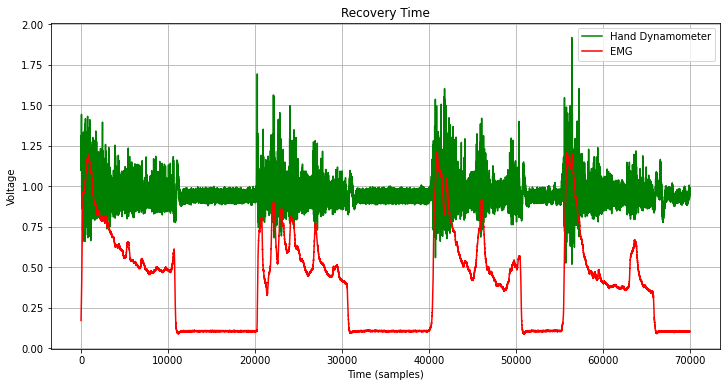

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(data_subset['Voltage_1'], label='Hand Dynamometer', color='green')
plt.plot(data_subset['Voltage_0'], label='EMG', color='red')
plt.title('Recovery Time')
plt.xlabel('Time (samples)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [45]:
# Define the time intervals in milliseconds
intervals = [(0, 10), (21, 30), (41, 50),(56,65)]

# Calculate data points for each time interval (milliseconds to data point conversion)
data_points_per_second = 1000  # Sampling rate
data_points = [(start * data_points_per_second, end * data_points_per_second) for start, end in intervals]

# Initialize lists to store the statistics for each interval
min_values = []
max_values = []
median_values = []

# Initialize lists to store all data points for the combined intervals
combined_data_points_col_0 = []
combined_data_points_col_1 = []

# Calculate statistics for each interval and gather data for the combined intervals
for start, end in data_points:
    data_subset = df.iloc[start:end, :]
    
    min_col_0 = np.min(data_subset['Voltage_0'])
    max_col_0 = np.max(data_subset['Voltage_0'])
    median_col_0 = np.median(data_subset['Voltage_0'])

    min_col_1 = np.min(data_subset['Voltage_1'])
    max_col_1 = np.max(data_subset['Voltage_1'])
    median_col_1 = np.median(data_subset['Voltage_1'])
    
    min_values.append((min_col_0, min_col_1))
    max_values.append((max_col_0, max_col_1))
    median_values.append((median_col_0, median_col_1))
    
    # Gather data points for the combined intervals
    combined_data_points_col_0.extend(data_subset['Voltage_0'])
    combined_data_points_col_1.extend(data_subset['Voltage_1'])

# Calculate statistics for the combined intervals
min_combined_col_0 = np.min(combined_data_points_col_0)
max_combined_col_0 = np.max(combined_data_points_col_0)
median_combined_col_0 = np.median(combined_data_points_col_0)

min_combined_col_1 = np.min(combined_data_points_col_1)
max_combined_col_1 = np.max(combined_data_points_col_1)
median_combined_col_1 = np.median(combined_data_points_col_1)

# Print the results for each interval
for i, (start, end) in enumerate(intervals):
    print(f"Statistics for {start}-{end} seconds:")
    print(f"Minimum for Hand Dynamometer: {min_values[i][0]}, EMG: {min_values[i][1]}")
    print(f"Maximum for Hand Dynamometer: {max_values[i][0]}, EMG: {max_values[i][1]}")
    print(f"Median for Hand Dynamometer: {median_values[i][0]}, EMG: {median_values[i][1]}\n")

# Print the combined statistics
print("Statistics for All Three Intervals Combined:")
print(f"Minimum for Hand Dynamometer: {min_combined_col_0}, EMG: {min_combined_col_1}")
print(f"Maximum for Hand Dynamometer: {max_combined_col_0}, EMG: {max_combined_col_1}")
print(f"Median for Hand Dynamometer: {median_combined_col_0}, EMG: {median_combined_col_1}\n")


Statistics for 0-10 seconds:
Minimum for Hand Dynamometer: 0.170768, EMG: 0.657466
Maximum for Hand Dynamometer: 1.191223, EMG: 1.441987
Median for Hand Dynamometer: 0.599127, EMG: 0.933047

Statistics for 21-30 seconds:
Minimum for Hand Dynamometer: 0.327092, EMG: 0.680673
Maximum for Hand Dynamometer: 0.895658, EMG: 1.562211
Median for Hand Dynamometer: 0.532407, EMG: 0.93208

Statistics for 41-50 seconds:
Minimum for Hand Dynamometer: 0.351588, EMG: 0.659722
Maximum for Hand Dynamometer: 1.199281, EMG: 1.601212
Median for Hand Dynamometer: 0.521771, EMG: 0.933047

Statistics for 56-65 seconds:
Minimum for Hand Dynamometer: 0.3561, EMG: 0.517581
Maximum for Hand Dynamometer: 1.193802, EMG: 1.917084
Median for Hand Dynamometer: 0.441836, EMG: 0.934337

Statistics for All Three Intervals Combined:
Minimum for Hand Dynamometer: 0.170768, EMG: 0.517581
Maximum for Hand Dynamometer: 1.199281, EMG: 1.917084
Median for Hand Dynamometer: 0.525316, EMG: 0.933047



In [46]:
all_numbers = skip_row(77468)
df = pd.read_csv('dominant_non_dominant.csv', skiprows=all_numbers)

#uncomment below for callibration to Newton
#df['Voltage_0'] = (df['Voltage_0'] * 176.8325) - 19.5057
df.shape

(69800, 2)

In [47]:
# Calculate the number of data points for the first 110 seconds 
data_points = 69 * 1000

# Extract the first 110 seconds of data
data_subset = df.iloc[:data_points, :]

# Calculate minimum, maximum, and median for both columns
min_col_0 = np.min(data_subset['Voltage_0'])
max_col_0 = np.max(data_subset['Voltage_0'])
median_col_0 = np.median(data_subset['Voltage_0'])

min_col_1 = np.min(data_subset['Voltage_1'])
max_col_1 = np.max(data_subset['Voltage_1'])
median_col_1 = np.median(data_subset['Voltage_1'])

# Print the results
print("Statistics for Hand Dynamometer:")
print(f"Minimum: {min_col_0}")
print(f"Maximum: {max_col_0}")
print(f"Median: {median_col_0}\n")

print("Statistics for EMG:")
print(f"Minimum: {min_col_1}")
print(f"Maximum: {max_col_1}")
print(f"Median: {median_col_1}")


Statistics for Hand Dynamometer:
Minimum: 0.086966
Maximum: 1.365597
Median: 0.528217

Statistics for EMG:
Minimum: 0.534664
Maximum: 1.746255
Median: 0.934659


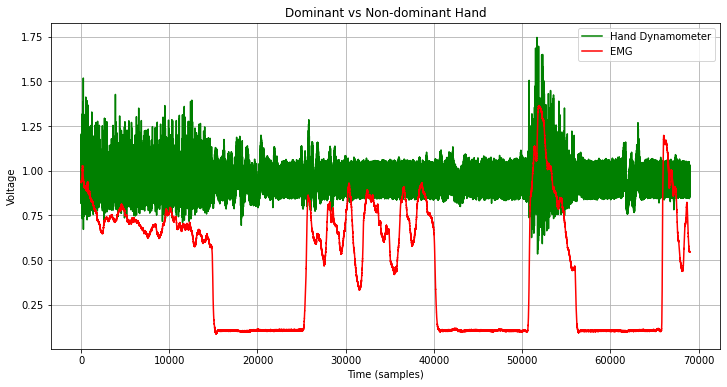

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(data_subset['Voltage_1'], label='Hand Dynamometer', color='green')
plt.plot(data_subset['Voltage_0'], label='EMG', color='red')
plt.title('Dominant vs Non-dominant Hand')
plt.xlabel('Time (samples)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [49]:
# Define the time intervals in milliseconds
intervals = [(0, 15), (26, 40), (51,55 ),(66,69)]

# Calculate data points for each time interval (milliseconds to data point conversion)
data_points_per_second = 1000  # Sampling rate
data_points = [(start * data_points_per_second, end * data_points_per_second) for start, end in intervals]

# Initialize lists to store the statistics for each interval
min_values = []
max_values = []
median_values = []

# Initialize lists to store all data points for the combined intervals
combined_data_points_col_0 = []
combined_data_points_col_1 = []

# Calculate statistics for each interval and gather data for the combined intervals
for start, end in data_points:
    data_subset = df.iloc[start:end, :]
    
    min_col_0 = np.min(data_subset['Voltage_0'])
    max_col_0 = np.max(data_subset['Voltage_0'])
    median_col_0 = np.median(data_subset['Voltage_0'])

    min_col_1 = np.min(data_subset['Voltage_1'])
    max_col_1 = np.max(data_subset['Voltage_1'])
    median_col_1 = np.median(data_subset['Voltage_1'])
    
    min_values.append((min_col_0, min_col_1))
    max_values.append((max_col_0, max_col_1))
    median_values.append((median_col_0, median_col_1))
    
    # Gather data points for the combined intervals
    combined_data_points_col_0.extend(data_subset['Voltage_0'])
    combined_data_points_col_1.extend(data_subset['Voltage_1'])

# Calculate statistics for the combined intervals
min_combined_col_0 = np.min(combined_data_points_col_0)
max_combined_col_0 = np.max(combined_data_points_col_0)
median_combined_col_0 = np.median(combined_data_points_col_0)

min_combined_col_1 = np.min(combined_data_points_col_1)
max_combined_col_1 = np.max(combined_data_points_col_1)
median_combined_col_1 = np.median(combined_data_points_col_1)

# Print the results for each interval
for i, (start, end) in enumerate(intervals):
    print(f"Statistics for {start}-{end} seconds:")
    print(f"Minimum for Hand Dynamometer: {min_values[i][0]}, EMG: {min_values[i][1]}")
    print(f"Maximum for Hand Dynamometer: {max_values[i][0]}, EMG: {max_values[i][1]}")
    print(f"Median for Hand Dynamometer: {median_values[i][0]}, EMG: {median_values[i][1]}\n")

# Print the combined statistics
print("Statistics for All Three Intervals Combined:")
print(f"Minimum for Hand Dynamometer: {min_combined_col_0}, EMG: {min_combined_col_1}")
print(f"Maximum for Hand Dynamometer: {max_combined_col_0}, EMG: {max_combined_col_1}")
print(f"Median for Hand Dynamometer: {median_combined_col_0}, EMG: {median_combined_col_1}\n")


Statistics for 0-15 seconds:
Minimum for Hand Dynamometer: 0.23781, EMG: 0.672293
Maximum for Hand Dynamometer: 1.029098, EMG: 1.519021
Median for Hand Dynamometer: 0.705169, EMG: 0.93337

Statistics for 26-40 seconds:
Minimum for Hand Dynamometer: 0.332893, EMG: 0.774467
Maximum for Hand Dynamometer: 0.93208, EMG: 1.163182
Median for Hand Dynamometer: 0.69421, EMG: 0.934014

Statistics for 51-55 seconds:
Minimum for Hand Dynamometer: 0.633615, EMG: 0.534664
Maximum for Hand Dynamometer: 1.365597, EMG: 1.746255
Median for Hand Dynamometer: 1.01137, EMG: 0.924022

Statistics for 66-69 seconds:
Minimum for Hand Dynamometer: 0.437324, EMG: 0.782203
Maximum for Hand Dynamometer: 1.197992, EMG: 1.09066
Median for Hand Dynamometer: 0.8255545, EMG: 0.934981

Statistics for All Three Intervals Combined:
Minimum for Hand Dynamometer: 0.23781, EMG: 0.534664
Maximum for Hand Dynamometer: 1.365597, EMG: 1.746255
Median for Hand Dynamometer: 0.719351, EMG: 0.933047

